In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 18})
import seaborn as sns
import regex as re
import os
import numpy as np
from ast import literal_eval

In [3]:
plt.rcParams.update({'font.size': 24})

In [5]:
result_paths = [
    "/mnt/extra/continuous-training/results/1715800932305356174/parameters.txt",
    "/mnt/extra/continuous-training/results/1715797440000861620/parameters.txt",
    "/mnt/extra/continuous-training/results/1715829270852093274/parameters.txt",
    "/mnt/extra/continuous-training/results/1715824045022882806/parameters.txt",
    "/mnt/extra/continuous-training/results/1715788174518859352/parameters.txt",
    "/mnt/extra/continuous-training/results/1715798673120208944/parameters.txt",
    "/mnt/extra/continuous-training/results/1715827831526188263/parameters.txt",
    "/mnt/extra/continuous-training/results/1715784179206269278/parameters.txt",
    "/mnt/extra/continuous-training/results/1715826410660371920/parameters.txt",
    "/mnt/extra/continuous-training/results/1715797482983971494/parameters.txt",
    "/mnt/extra/continuous-training/results/1715831605658106103/parameters.txt",
    "/mnt/extra/continuous-training/results/1715787184529834842/parameters.txt",
    "/mnt/extra/continuous-training/results/1715824912969658937/parameters.txt",
]

In [10]:
stats_df = pd.DataFrame(columns=['folder_path', 'algo', 'param_path', 'csv_path'])
for stat in result_paths:
    contents = []
    with open(stat, "r") as f:
        contents = f.readlines()
    folder_path = contents[-1].split('Output =')[1].split('\n')[0]
    param_path = stat
    algo_name = contents[-2].split('=')[1].split('\n')[0]
    csv_path = os.path.join(folder_path, algo_name)
    stats_df.loc[len(stats_df)] = [folder_path, algo_name, param_path, csv_path]
stats_df

,folder_path,algo,param_path,csv_path
0,/mnt/extra/continuous-training/results/1715800...,nn_clf_js,/mnt/extra/continuous-training/results/1715800...,/mnt/extra/continuous-training/results/1715800...
1,/mnt/extra/continuous-training/results/1715797...,nn_clf_labeler,/mnt/extra/continuous-training/results/1715797...,/mnt/extra/continuous-training/results/1715797...
2,/mnt/extra/continuous-training/results/1715829...,nn_clf_ks,/mnt/extra/continuous-training/results/1715829...,/mnt/extra/continuous-training/results/1715829...
3,/mnt/extra/continuous-training/results/1715824...,nn_clf_ph,/mnt/extra/continuous-training/results/1715824...,/mnt/extra/continuous-training/results/1715824...
4,/mnt/extra/continuous-training/results/1715788...,nn_clf_quartile,/mnt/extra/continuous-training/results/1715788...,/mnt/extra/continuous-training/results/1715788...
5,/mnt/extra/continuous-training/results/1715798...,nn_clf_psi,/mnt/extra/continuous-training/results/1715798...,/mnt/extra/continuous-training/results/1715798...
6,/mnt/extra/continuous-training/results/1715827...,nn_clf_ks,/mnt/extra/continuous-training/results/1715827...,/mnt/extra/continuous-training/results/1715827...
7,/mnt/extra/continuous-training/results/1715784...,nn_clf_ip_based,/mnt/extra/continuous-training/results/1715784...,/mnt/extra/continuous-training/results/1715784...
8,/mnt/extra/continuous-training/results/1715826...,nn_clf_ks,/mnt/extra/continuous-training/results/1715826...,/mnt/extra/continuous-training/results/1715826...
9,/mnt/extra/continuous-training/results/1715797...,nn_clf_kl,/mnt/extra/continuous-training/results/1715797...,/mnt/extra/continuous-training/results/1715797...


In [103]:
values_df = pd.DataFrame({
    'path': pd.Series(dtype='string'),
    'algo': pd.Series(dtype='string'),
    'length': pd.Series(dtype='int'),
    'f1': pd.Series(dtype='object'),
    'roc_auc': pd.Series(dtype='object'),
    'retrain': pd.Series(dtype='int'),
})

for i, row in stats_df.iterrows():
    temp_df = pd.read_csv(row['csv_path'], index_col=0)
    temp_df = temp_df.drop_duplicates(subset='minute', keep="last")
    retrain_list = temp_df['retrain'].tolist()
    retrain = [i for i in retrain_list if i==True]
    if i != 3:
        values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist()[:-5], temp_df['roc_auc'].tolist()[:-5], len(retrain)]
    else:
        values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist(), temp_df['roc_auc'].tolist(), len(retrain)]

values_df.drop([2, 6, 8], inplace=True)
values_df.to_csv('values.csv')
values_df

,path,algo,length,f1,roc_auc,retrain
0,/mnt/extra/continuous-training/results/1715800...,nn_clf_js,40,"[0.9212051832258747, 0.916480472712358, 0.9207...","[0.8144567334296791, 0.8097079640548548, 0.776...",11
1,/mnt/extra/continuous-training/results/1715797...,nn_clf_labeler,40,"[0.919025359413844, 0.9142946583702416, 0.9190...","[0.8097642421366046, 0.8050139019166476, 0.773...",0
3,/mnt/extra/continuous-training/results/1715824...,nn_clf_ph,35,"[0.920295832201752, 0.9078172109526736, 0.9186...","[0.8149322162238021, 0.7977812276089291, 0.826...",30
4,/mnt/extra/continuous-training/results/1715788...,nn_clf_quartile,40,"[0.9209631112324224, 0.9162306349727704, 0.920...","[0.8168314277712315, 0.8124214967936576, 0.782...",0
5,/mnt/extra/continuous-training/results/1715798...,nn_clf_psi,40,"[0.92051441358165, 0.9159079424049568, 0.92025...","[0.8150323115432546, 0.8106551472623411, 0.778...",0
7,/mnt/extra/continuous-training/results/1715784...,nn_clf_ip_based,40,"[0.9200075657272556, 0.9151635849507276, 0.914...","[0.8121293906859004, 0.8074535759712123, 0.824...",30
9,/mnt/extra/continuous-training/results/1715797...,nn_clf_kl,40,"[0.9211018041644684, 0.9083253704391042, 0.918...","[0.818552485713337, 0.7978138519567903, 0.8226...",35
10,/mnt/extra/continuous-training/results/1715831...,nn_clf_ks,40,"[0.9196600263459394, 0.9080157445265884, 0.917...","[0.8122190307244015, 0.796473260362244, 0.8266...",35
11,/mnt/extra/continuous-training/results/1715787...,nn_clf_outlier,40,"[0.919744230434662, 0.9149322180294932, 0.9192...","[0.811314294660065, 0.8061061904357527, 0.7715...",0
12,/mnt/extra/continuous-training/results/1715824...,nn_clf_noretrain,40,"[0.920321145352751, 0.9157556677346482, 0.9200...","[0.8147857454557872, 0.8105663342623017, 0.779...",0


In [54]:
print(['/mnt/extra/continuous-training/results/zoo', 'model_zoo', temp_df['window'].max(), temp_df['best_f1'].values.tolist(), temp_df['best_roc'].values.tolist(), 6])

['/mnt/extra/continuous-training/results/zoo', 'model_zoo', 40, [0.9996689704982497, 0.8932194347493524, 0.8928637233364042, 0.8899902558986614, 0.9037468907409484, 0.8923677135925513, 0.894563530469542, 0.9030128468671914, 0.8997965431251633, 0.8931433635332843, 0.8900674221434771, 0.9034857934777432, 0.8937938519769374, 0.8945783132530121, 0.8880027114586609, 0.8885678444888712, 0.8824657360611835, 0.8818877309535899, 0.8816014793497521, 0.8917531108778854, 0.8833541564278228, 0.887421040733008, 0.8843357457782215, 0.8998599366518466, 0.9026335719346248, 0.8879147378960713, 0.8875058237134216, 0.895900415756813, 0.886764918592012, 0.9027540880539756, 0.8845993063371385, 0.9004443729919692, 0.8949205772425249, 0.8975544080386131, 0.8963408956484449, 0.8931758512855384], [0.999621477650904, 0.8020791290791536, 0.7998767503067503, 0.7995476843765938, 0.8017675080828703, 0.762080878049304, 0.7780803866864373, 0.7809052563583464, 0.7813454333828738, 0.7816924209567234, 0.780323049019595, 

In [ ]:
result_paths.append('/mnt/extra/continuous-training/results/zoo/zoo.csv')
temp_df = pd.read_csv('/mnt/extra/continuous-training/results/zoo/zoo.csv', index_col=0)
temp_df['best_f1'] = temp_df['best_f1'].astype(float)
temp_df['best_roc'] = temp_df['best_roc'].astype(float)
temp_df.reset_index(inplace=True, drop=True)
print(temp_df['best_roc'].tolist())
values_df.loc[len(values_df)] = ['/mnt/extra/continuous-training/results/zoo', 'model_zoo', temp_df['window'].max(), temp_df['best_f1'].values.tolist(), temp_df['best_roc'].values.tolist(), 6]
values_df

In [104]:
values_df = pd.read_csv('values.csv', index_col=0)
values_df['f1'] = values_df['f1'].apply(literal_eval)
values_df['roc_auc'] = values_df['roc_auc'].apply(literal_eval)
values_df

,path,algo,length,f1,roc_auc,retrain
0,/mnt/extra/continuous-training/results/1715800...,nn_clf_js,40,"[0.9212051832258747, 0.916480472712358, 0.9207...","[0.8144567334296791, 0.8097079640548548, 0.776...",11
1,/mnt/extra/continuous-training/results/1715797...,nn_clf_labeler,40,"[0.919025359413844, 0.9142946583702416, 0.9190...","[0.8097642421366046, 0.8050139019166476, 0.773...",0
3,/mnt/extra/continuous-training/results/1715824...,nn_clf_ph,35,"[0.920295832201752, 0.9078172109526736, 0.9186...","[0.8149322162238021, 0.7977812276089291, 0.826...",30
4,/mnt/extra/continuous-training/results/1715788...,nn_clf_quartile,40,"[0.9209631112324224, 0.9162306349727704, 0.920...","[0.8168314277712315, 0.8124214967936576, 0.782...",0
5,/mnt/extra/continuous-training/results/1715798...,nn_clf_psi,40,"[0.92051441358165, 0.9159079424049568, 0.92025...","[0.8150323115432546, 0.8106551472623411, 0.778...",0
7,/mnt/extra/continuous-training/results/1715784...,nn_clf_ip_based,40,"[0.9200075657272556, 0.9151635849507276, 0.914...","[0.8121293906859004, 0.8074535759712123, 0.824...",30
9,/mnt/extra/continuous-training/results/1715797...,nn_clf_kl,40,"[0.9211018041644684, 0.9083253704391042, 0.918...","[0.818552485713337, 0.7978138519567903, 0.8226...",35
10,/mnt/extra/continuous-training/results/1715831...,nn_clf_ks,40,"[0.9196600263459394, 0.9080157445265884, 0.917...","[0.8122190307244015, 0.796473260362244, 0.8266...",35
11,/mnt/extra/continuous-training/results/1715787...,nn_clf_outlier,40,"[0.919744230434662, 0.9149322180294932, 0.9192...","[0.811314294660065, 0.8061061904357527, 0.7715...",0
12,/mnt/extra/continuous-training/results/1715824...,nn_clf_noretrain,40,"[0.920321145352751, 0.9157556677346482, 0.9200...","[0.8147857454557872, 0.8105663342623017, 0.779...",0


In [106]:
len(values_df['roc_auc'].loc[3])

31

In [85]:
values_df['overhead'] = [0.00878, 0.00823, 0.01961, 0.00079, 0.00984, 0.00844, 0.02328, 0.00858, 0.00071, 0.00980, 0.012]

In [ ]:
# low = p01
# open = p25
# close = p75
# high = p99
df_plot = pd.DataFrame(columns=['idx', 'retrain', 'low', 'open', 'close', 'high', 'cpu_overhead'])

idx_dict = {
    'algo_0_ip_5': 'IP-based',
    'algo_4_ks_test_thpt': 'KS-Test',
    'algo_6_psi_thpt': 'PSI',
    'algo_7_kl_thpt': 'KL-Div',
    'algo_8_js_thpt': 'JS-Div',
    'algo_9_model_nn': 'NeuralNetwork',
    'algo_9_cluster_kmeans': 'KMeans',
    # '1000': '1k I/O',
    '2000': '2k I/O',
    '4000': '4k I/O',
    '15': '15sec',
    '30': '30sec',
    '60': '1min',
    '240': '4min',
    '480': '8min',
    '5': 'Baseline'
}

    # 'algo_9_model_randforest': 'DD_m_rf',
    # 'DD_m_rf': 'fuchsia',
    
idx_color = { 
    'IP-based': 'royalblue',
    'KS-Test': 'gold',
    'PSI': 'limegreen',
    'KL-Div': 'lime',
    'JS-Div': 'cornflowerblue',
    'NeuralNetwork': 'blue',
    'KMeans': 'forestgreen',
    # '1k I/O': 'yellow',
    '2k I/O': 'red',
    '4k I/O': 'orange',
    '15sec': 'darkred',
    '30sec': 'darkorange',
    '1min': 'salmon',
    '4min': 'darkgreen',
    '8min': 'cyan',
    'Baseline': 'brown',
}

In [ ]:
for i, row in values_df.iterrows():
    df_plot.loc[len(df_plot)] = [idx_dict[dir], num_retrain, np.percentile(roc_list, 1)*100, np.percentile(roc_list, 25)*100, np.percentile(roc_list, 75)*100, np.percentile(roc_list, 99)*100, cpu_overhead*100]

In [ ]:
df_plot.loc[len(df_plot)] = ["KMeans", 4.177778, 67.063, 79.525, 88.050, 89.412, 0.1186]
df_plot.loc[len(df_plot)] = ["NeuralNetwork", 2.844444, 67.846, 79.150, 87.600, 89.601, 0.0728]
df_plot.sort_values(by=['retrain', 'open', 'close'], ascending=[True, True, False], inplace=True)
df_plot.reset_index(inplace=True, drop=True)
df_plot

In [ ]:
plt.figure(figsize=(15, 5))

plt.xlim(-100, df_plot['retrain'].max()+100)
plt.xlabel('Number of Retrain(s)')

plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')

bar_width = 50
stick_width = 10

for index, row in df_plot.iterrows():
    # Bottom to top: LOCH (L-H), (O-C)
    plt.bar(row.retrain, row.close-row.open, bar_width, row.open, color=idx_color[row['idx']], label=row['idx']) # main bar
    plt.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
    plt.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [ ]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 7), gridspec_kw={'width_ratios': [5, 1]})

# plt.xlim(-100, df_plot['retrain'].max()+100)
ax.set_xlabel('Number of Retrain(s)')

# plt.ylim(0, 100)
ax.set_ylabel('Accuracy (%)')

bar_width = 0.75
stick_width = 0.1

for index, row in df_plot.iterrows():
    if index != 1:
        # Bottom to top: LOCH (L-H), (O-C)
        ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=idx_color[row['idx']], label=row['idx']) # main bar
        ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
        ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=idx_color[row['idx']], label=row['idx']) # main bar
        ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

row = df_plot.loc[1]

# Bottom to top: LOCH (L-H), (O-C)
ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=idx_color[row['idx']], label=row['idx']) # main bar
ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=idx_color[row['idx']], label=row['idx']) # main bar
ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
ax.set_xlim(0, 35)
ax2.set_xlim(8278, 8285)
ax.set_ylim(38, 95)
ax2.set_ylim(38, 95)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
ax2.yaxis.tick_right()
ax2.tick_params(labelright='off')

d = 0.01  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.legend(bbox_to_anchor=(-5.6, 0.35), loc="upper left",
           title="Retraining Strategy", alignment='center', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0, 
           handletextpad=0.2, handlelength=0.5, ncol=7)

plt.show()

In [ ]:
from sklearn import preprocessing

normalize_min = 0.1
normalize_max = 1

labels = ["Baseline", "       1min", "       4min", "      8min", "     KL-Div", "     2k I/O", "     PSI", "     JS-Div", "     4k I/O", "    15sec", "    30sec", "    KS-Test", "    IP-based", "    KMeans", "    NeuralNetwork"]

fig, ax = plt.subplots(figsize=(5, 8))
df_plot_sorted = df_plot.sort_values('cpu_overhead', ascending=False)
df_plot_sorted['cpu_overhead_norm'] = preprocessing.minmax_scale(df_plot_sorted['cpu_overhead'], feature_range=(normalize_min, normalize_max))
plt.barh(labels, df_plot_sorted['cpu_overhead_norm'], color=[idx_color[x] for x in df_plot_sorted['idx']], label=df_plot_sorted['idx'])
for ticklabel in ax.yaxis.get_majorticklabels():
    ticklabel.set_horizontalalignment("left")
    ticklabel.set_verticalalignment("center_baseline")
for ticklabel in ax.xaxis.get_majorticklabels():
    ticklabel.set_horizontalalignment("center")
ax.tick_params(axis='y', which='major', length=0, pad=-5)
plt.xlabel('CPU overhead (% norm.)')
# plt.xticks(rotation='vertical')
plt.ylabel('Retraining Condition')
# plt.legend()
plt.show()

## 2

In [61]:
import os
import sys
import warnings
from pathlib import Path

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from IPython.display import HTML, display

warnings.filterwarnings("ignore")

In [62]:
plt.rcParams.update({'font.size': 16})

In [ ]:
def get_stats_per_10_mins(df, training_stat):
    assert len(df) == 480
    # convert types to ints/floats
    df["minute"] = df["minute"].astype(float)
    df["us"] = df["us"].astype(float)
    df["roc_auc"] = df["roc_auc"].astype(float)
    # group by 10 minutes
    df =  df.groupby(np.arange(len(df))//10).agg( 
        {"minute": "max", "us": "max", "roc_auc": "mean"} 
        )
    df["minute"] = (df["minute"] / 10).astype(int)
    df.loc[-1] = [0, 0, training_stat["roc_auc"]]
    df.sort_index(inplace=True)
    # reset index
    df.reset_index(drop=True, inplace=True)
    return df


In [ ]:
# read per-minute data from csv
retrain = pd.read_csv("../data/v8/rani_raw_simple_cl.csv", index_col=0)
train_first_1min = pd.read_csv("../data/v8/rani_1_min.csv", index_col=0)
train_first_5min = pd.read_csv("../data/v8/rani_5_min.csv", index_col=0)
train_first_10min = pd.read_csv("../data/v8/rani_10_min.csv", index_col=0)
train_first_15min = pd.read_csv("../data/v8/rani_15_min.csv", index_col=0)
train_first_30min = pd.read_csv("../data/v8/rani_30_min.csv", index_col=0)


# Get the indexes of the minutes that need to be retrained
retrain_indexes = []
for idx, row in retrain.iterrows():
    if row["retrain"] == True:
        retrain_indexes.append(idx)
print(retrain_indexes)
# remove one of the consecutive retraining indexes
# retrain_indexes.remove(86)

# get the first row because it is the training accuracy
retrain_row0 = retrain.iloc[0]
train_first_5min_row0 = train_first_5min.iloc[0]
train_first_10min_row0 = train_first_10min.iloc[0]
train_first_30min_row0 = train_first_30min.iloc[0]
train_first_1min_row0 = train_first_1min.iloc[0]
train_first_15min_row0 = train_first_15min.iloc[0]

# remove the first row
retrain = retrain.iloc[1:]
train_first_5min = train_first_5min.iloc[1:]
train_first_10min = train_first_10min.iloc[1:]
train_first_30min = train_first_30min.iloc[1:]
train_first_1min = train_first_1min.iloc[1:]
train_first_15min = train_first_15min.iloc[1:]

# group per 10 mins 
retrain = get_stats_per_10_mins(retrain, retrain_row0)
train_first_5min = get_stats_per_10_mins(train_first_5min, train_first_5min_row0)
train_first_10min = get_stats_per_10_mins(train_first_10min, train_first_10min_row0)
train_first_30min = get_stats_per_10_mins(train_first_30min, train_first_30min_row0)
train_first_1min = get_stats_per_10_mins(train_first_1min, train_first_1min_row0)
train_first_15min = get_stats_per_10_mins(train_first_15min, train_first_15min_row0)

print(retrain)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 2))  # , constrained_layout=True)
# print(roc_aucs_temp.keys())

# insert data to dictionary
roc_aucs_temp = {}
roc_aucs_temp["Retrain"] = retrain.copy()
roc_aucs_temp["First 5 min"] = train_first_5min.copy()
roc_aucs_temp["First 10 min"] = train_first_10min.copy()
roc_aucs_temp["First 30 min"] = train_first_30min.copy()
roc_aucs_temp["First 1 min"] = train_first_1min.copy()
roc_aucs_temp["First 15 min"] = train_first_15min.copy()
print(roc_aucs_temp.keys())

roc_aucs = roc_aucs_temp.copy()
# remove the unused keys
roc_aucs.pop("First 1 min", None)
roc_aucs.pop("First 5 min", None)
roc_aucs.pop("First 10 min", None)
roc_aucs.pop("First 30 min", None)

print(roc_aucs.keys())
# size is same
x = np.arange(0, len(roc_aucs[list(roc_aucs.keys())[0]]))

# get mean
means = {}
for key, value in roc_aucs.items():
    means[key] = value["roc_auc"].mean()

# sort based on mean
means = dict(sorted(means.items(), key=lambda item: item[1], reverse=True))

MARKERS = ["^", "D", "v", "P"]
MARKER_SIZES = [10, 7, 7, 7]
COLORS = ["b", "orange", "r", "m"]
styles = {}
for marker, color, marker_size, key in zip(MARKERS, COLORS, MARKER_SIZES, means.keys()):
    styles[key] = [marker, color, marker_size]

for i, key in enumerate(reversed(means.keys())):
    [marker, color, marker_size] = styles[key]
    value = roc_aucs[key]
    # print(key, value)
    sns.lineplot(
        data=value,
        ax=ax,
        label=key,
        x=x,
        y="roc_auc",
        marker=marker,
        color=color,
        markersize=marker_size,
        linestyle="-",
        linewidth=1.25,
    )
    # break

# ax.set_xlabel("Time Window (per 10 minutes)")
ax.set_xlabel("Timestamp (hour)")
ax.xaxis.set_label_coords(0.5, -0.23)
# ax.set_ylabel("ROC-AUC (%)")
ax.set_ylabel("Accuracy (%)")
ax.yaxis.set_label_coords(-0.06, 0.5)
# Minor adjustment. The ylabel is in (%) but previously, the yticks are in 0.xx
ax.yaxis.set_ticks([0.6, 0.7, 0.8, 0.9], labels=["60", "70", "80", "90"])
ax.set_ylim(0.58, 0.92)
# show 49 at the end
ax.set_xticks(np.arange(0, 50, 6))
# rename the x-ticks to 0-8
ax.xaxis.set_ticks(
    np.arange(0, 50, 6), labels=["0", "1", "2", "3", "4", "5", "6", "7", "8"]
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    labels,
    ncol=5,
    handlelength=0.8,
    loc="upper center",
    # fontsize=fontsize,
    bbox_to_anchor=(0.5, 0.4),
    frameon=False,
    # reduce the space between the legend
    handletextpad=0.17,
    columnspacing=0.7,
)

plt.text(45.7, 0.868, "(b)", fontweight='bold')
# shift x-tick by 1
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x + 1)))
ax.set_xlim(-0.5, 48.5)
ax.tick_params(axis="y")
# fig.tight_layout()

# add vertical lin at x=30
print(retrain_indexes)
for idx in retrain_indexes:
    ax.axvline(x=idx / 10, color="blue", linestyle="--", linewidth=0.5)
# ax.axvline(x=30, color="blue", linestyle="--", linewidth=0.5)

# remove x ticks
# ax.set_xticks([])
# remove legends
ax.get_legend().remove()

fig.savefig(
    result_path / "long-term-eval-with-retrain.eps", dpi=300, bbox_inches="tight", format="eps"
)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9, 2))  # , constrained_layout=True)
# print(roc_aucs_temp.keys())

print(roc_aucs_temp.keys())

roc_aucs = roc_aucs_temp.copy()

# remove unused keys
roc_aucs.pop("First 30 min", None)
roc_aucs.pop("First 10 min", None)

print(roc_aucs.keys())
# size is same
x = np.arange(0, len(roc_aucs[list(roc_aucs.keys())[0]]))

# increase the value of retrain-v1 to make it dissapear from the graph
for i in range(0, len(roc_aucs["Retrain"]["roc_auc"])):
    roc_aucs["Retrain"]["roc_auc"][i] = 1

# get mean
means = {}
for key, value in roc_aucs.items():
    means[key] = value["roc_auc"].mean()

# sort based on mean
means = dict(sorted(means.items(), key=lambda item: item[1], reverse=True))

MARKERS = [ "^", "D", "v", "P", "P", "P"]
MARKER_SIZES = [10, 7, 7, 7, 7, 7]
COLORS = [ "b", "orange", "r", "m", "g", "w" ]
styles = {}
for marker, color, marker_size, key in zip(MARKERS, COLORS, MARKER_SIZES, means.keys()):
    styles[key] = [marker, color, marker_size]

for i, key in enumerate(reversed(means.keys())):
    [marker, color, marker_size] = styles[key]
    value = roc_aucs[key]
    # print(key, value)
    sns.lineplot(
        data=value,
        ax=ax,
        label=key,
        x=x,
        y="roc_auc",
        marker=marker,
        color=color,
        markersize=marker_size,
        linestyle="-",
        linewidth=1.25,
    )

# ax.set_xlabel("Time Window (per 10 minutes)")
# ax.set_xlabel("Timestamp (hour)")
# ax.set_ylabel("ROC-AUC (%)")
ax.set_ylabel("Accuracy (%)")
ax.yaxis.set_label_coords(-0.06, 0.505)
# Minor adjustment. The ylabel is in (%) but previously, the yticks are in 0.xx
ax.yaxis.set_ticks([0.6, 0.7, 0.8, 0.9], labels=["60", "70", "80", "90"])
# ax.yaxis.set_label_coords(-0.055, 0.5)
ax.set_ylim(0.58, 0.92)
# show 49 at the end
ax.set_xticks(np.arange(0, 50, 6))
# rename the x-ticks to 0-8
ax.xaxis.set_ticks(
    np.arange(0, 50, 6), labels=["0", "1", "2", "3", "4", "5", "6", "7", "8"]
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    labels,
    ncol=5,
    handlelength=0.8,
    loc="upper center",
    # fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.08),
    # bbox_to_anchor=(0.5, 0.32),
    frameon=False,
    # reduce the space between the legend
    handletextpad=0.17,
    columnspacing=0.7,
)

plt.text(45.71, 0.87, "(a)", fontweight='bold')
# shift x-tick by 1
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x + 1)))
ax.set_xlim(-0.5, 48.5)

ax.tick_params(axis="y")
ax.set_xticks([])
# fig.tight_layout()
fig.savefig(
    result_path / "long-term-eval-no-retrain.eps", dpi=300, bbox_inches="tight", format="eps"
)

plt.show()

In [107]:
values_df['idx'] = ['JS-Div', 'Labeler', 'PageHinkley', 'Quartile', 'PSI', 'IP-based', 'KL-Div', 'KS-Test', 'Outlier', 'NoRetrain', 'ModelZoo']
values_df

,path,algo,length,f1,roc_auc,retrain,idx
0,/mnt/extra/continuous-training/results/1715800...,nn_clf_js,40,"[0.9212051832258747, 0.916480472712358, 0.9207...","[0.8144567334296791, 0.8097079640548548, 0.776...",11,JS-Div
1,/mnt/extra/continuous-training/results/1715797...,nn_clf_labeler,40,"[0.919025359413844, 0.9142946583702416, 0.9190...","[0.8097642421366046, 0.8050139019166476, 0.773...",0,Labeler
3,/mnt/extra/continuous-training/results/1715824...,nn_clf_ph,35,"[0.920295832201752, 0.9078172109526736, 0.9186...","[0.8149322162238021, 0.7977812276089291, 0.826...",30,PageHinkley
4,/mnt/extra/continuous-training/results/1715788...,nn_clf_quartile,40,"[0.9209631112324224, 0.9162306349727704, 0.920...","[0.8168314277712315, 0.8124214967936576, 0.782...",0,Quartile
5,/mnt/extra/continuous-training/results/1715798...,nn_clf_psi,40,"[0.92051441358165, 0.9159079424049568, 0.92025...","[0.8150323115432546, 0.8106551472623411, 0.778...",0,PSI
7,/mnt/extra/continuous-training/results/1715784...,nn_clf_ip_based,40,"[0.9200075657272556, 0.9151635849507276, 0.914...","[0.8121293906859004, 0.8074535759712123, 0.824...",30,IP-based
9,/mnt/extra/continuous-training/results/1715797...,nn_clf_kl,40,"[0.9211018041644684, 0.9083253704391042, 0.918...","[0.818552485713337, 0.7978138519567903, 0.8226...",35,KL-Div
10,/mnt/extra/continuous-training/results/1715831...,nn_clf_ks,40,"[0.9196600263459394, 0.9080157445265884, 0.917...","[0.8122190307244015, 0.796473260362244, 0.8266...",35,KS-Test
11,/mnt/extra/continuous-training/results/1715787...,nn_clf_outlier,40,"[0.919744230434662, 0.9149322180294932, 0.9192...","[0.811314294660065, 0.8061061904357527, 0.7715...",0,Outlier
12,/mnt/extra/continuous-training/results/1715824...,nn_clf_noretrain,40,"[0.920321145352751, 0.9157556677346482, 0.9200...","[0.8147857454557872, 0.8105663342623017, 0.779...",0,NoRetrain


In [133]:
idx_color = { 
    'IP-based': 'royalblue',
    'Outlier': 'green',
    'Quartile': 'darkgreen',
    'Labeler': 'red',
    'KS-Test': 'gold',
    'PSI': 'limegreen',
    'KL-Div': 'lime',
    'JS-Div': 'cornflowerblue',
    'ModelZoo': 'pink',
    'NoRetrain': 'black',
    'PageHinkley': 'brown'
}

# 'JS-Div', 'Labeler', 'PageHinkley', 'Quartile', 'PSI', 'IP-based', 'KL-Div', 'KS-Test', 'Outlier', 'NoRetrain', 'ModelZoo'
# 'cornflowerblue', 'red', 'purple', 'darkgreen', 'limegreen', 'royalblue', 'lime', 'gold', 'green', 'grey', 'cyan'

In [109]:
values_df['f1']

0     [0.9212051832258747, 0.916480472712358, 0.9207...
1     [0.919025359413844, 0.9142946583702416, 0.9190...
3     [0.920295832201752, 0.9078172109526736, 0.9186...
4     [0.9209631112324224, 0.9162306349727704, 0.920...
5     [0.92051441358165, 0.9159079424049568, 0.92025...
7     [0.9200075657272556, 0.9151635849507276, 0.914...
9     [0.9211018041644684, 0.9083253704391042, 0.918...
10    [0.9196600263459394, 0.9080157445265884, 0.917...
11    [0.919744230434662, 0.9149322180294932, 0.9192...
12    [0.920321145352751, 0.9157556677346482, 0.9200...
13    [0.9996689704982497, 0.8932194347493524, 0.892...
Name: f1, dtype: object

In [110]:
print(len(values_df['f1'].loc[0]))
print(len(values_df['f1'].loc[1]))
print(len(values_df['f1'].loc[3]))
print(len(values_df['f1'].loc[4]))
print(len(values_df['f1'].loc[5]))
print(len(values_df['f1'].loc[7]))
print(len(values_df['f1'].loc[9]))
print(len(values_df['f1'].loc[10]))
print(len(values_df['f1'].loc[11]))
print(len(values_df['f1'].loc[12]))

31
31
31
31
31
31
31
31
31
31


In [111]:
plot_df = pd.DataFrame(columns=['JS-Div', 'Labeler', 'PageHinkley', 'Quartile', 'PSI', 'IP-based', 'KL-Div', 'KS-Test', 'Outlier', 'NoRetrain', 'ModelZoo'])
for i in range(31):
    print(i)
    plot_df.loc[len(plot_df)] = [values_df['f1'].loc[0][i], values_df['f1'].loc[1][i], values_df['f1'].loc[3][i], values_df['f1'].loc[4][i], values_df['f1'].loc[5][i], values_df['f1'].loc[7][i], values_df['f1'].loc[9][i], values_df['f1'].loc[10][i], values_df['f1'].loc[11][i], values_df['f1'].loc[12][i], values_df['f1'].loc[13][i]]

plot_df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


,JS-Div,Labeler,PageHinkley,Quartile,PSI,IP-based,KL-Div,KS-Test,Outlier,NoRetrain,ModelZoo
0,0.921205,0.919025,0.920296,0.920963,0.920514,0.920008,0.921102,0.919660,0.919744,0.920321,0.999669
1,0.916480,0.914295,0.907817,0.916231,0.915908,0.915164,0.908325,0.908016,0.914932,0.915756,0.893219
2,0.920719,0.919068,0.918608,0.920607,0.920260,0.914865,0.918983,0.917694,0.919236,0.920087,0.892864
3,0.912083,0.910100,0.905064,0.912128,0.911524,0.905286,0.906466,0.904305,0.910370,0.911212,0.889990
4,0.918626,0.917060,0.919348,0.918936,0.918141,0.918340,0.919380,0.919206,0.917159,0.918031,0.903747
5,0.912586,0.910854,0.906759,0.912929,0.912257,0.906084,0.907648,0.907815,0.911010,0.912072,0.892368
6,0.908020,0.906592,0.908792,0.908738,0.908064,0.908666,0.909864,0.909455,0.906570,0.908011,0.894564
7,0.903381,0.901511,0.906850,0.903844,0.903235,0.906923,0.907258,0.906949,0.901726,0.903017,0.903013
8,0.910078,0.908533,0.900286,0.910450,0.909805,0.902070,0.899964,0.901542,0.908519,0.909914,0.899797
9,0.908567,0.907007,0.899173,0.909023,0.908402,0.897629,0.898511,0.898024,0.906856,0.908412,0.893143


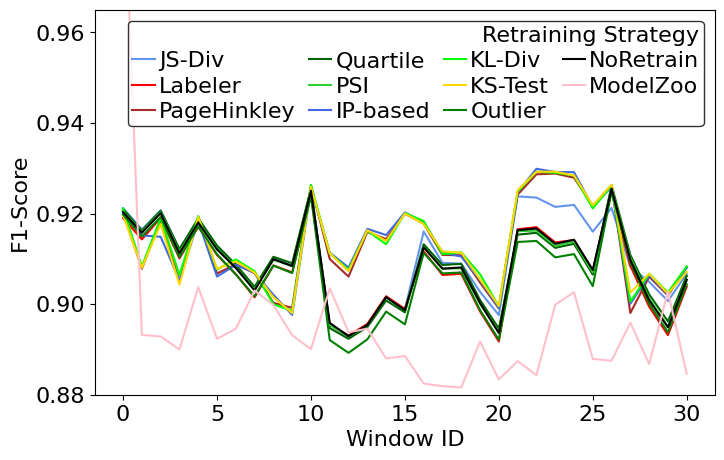

In [138]:
fig, ax = plt.subplots(figsize=(8, 5))
# plot_df.plot()
for col in plot_df.columns:
    plt.plot(plot_df.index, plot_df[col], label=col, color=idx_color[col])
plt.legend(ncol=4, loc="upper right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.88, 0.965)
plt.xlabel('Window ID')
plt.ylabel('F1-Score')
plt.show()